# Part 3 .- Price Elasticity and Cross-Price Elasticity of Demand 

## 3.1 Price Elasticity of Demand (cross-price elasticity located after price elasticity)

This model is based on Cost and Economics in Price Strategy certification by the University of Virginia.

In the following analysis, we select Best Buy products as our main price elasticity analysis. For future reference, this model can be implemented in every kind of vendor, e-commerce or brick and mortar.

**Hypothesis Proposed**
<t>
   
- From the Bestbuy laptop sample data in 2017. Is impression demand sensitive to its own product price changes?
  If yes, by how much is impression demand sensitive to price change?

**Machine Learning Model**
<t>
    
- Linear Regression

**Price Elasticity Formula**

- The price elasticity in demand is defined as the percentage change in quantity demanded divided by the percentage change in price (2003, OECD). In this model, price-elasticity is the calculation of how sensitive impression demand is to price change

   **Quantity percentage change / Price percentage change * Price Mean / Quantity Mean** (2019,John Doe)
   
## Content

- **3.1.1 Sample Selection**
- **3.1.2 Sample Imputation**
- **3.1.3 Linear Regression Model**
- **3.1.4 Price Elasticity Null Hypothesis**
- **3.1.5 Price Elasticity Results**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('price_clean.csv', encoding = "ISO-8859-1")

In [3]:
df_best = df[df['merchant']=='Bestbuy.com']

### 3.1.1 Sample Selection

For the price elasticity model, we take the following sample: 
<t>
Bestbuy main category is **laptop, computer** with **9.5% (1,071)** of total impression count

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
category = df_best['Category_name'].value_counts()
print("Bestbuy Category Percentage\n{}\n{}\n Bestbuy Category values count\n{}\n{}".format(
      50*"-", (category / len(df_best.index))[:5] * 100, 50*"-", category[:5]))

Bestbuy Category Percentage
--------------------------------------------------
laptop, computer                9.488792
speaker, portable, bluetooth    6.715691
car, speaker, subwoofer         4.899442
receiver, amplifier, home       4.429875
car, receiver, dash             3.641357
Name: Category_name, dtype: float64
 Bestbuy Category values count
--------------------------------------------------
laptop, computer                1071
speaker, portable, bluetooth     758
car, speaker, subwoofer          553
receiver, amplifier, home        500
car, receiver, dash              411
Name: Category_name, dtype: int64


In [6]:
df_laptop = df_best[df_best['Category_name']=='laptop, computer']

###  3.1.2 Sample Imputation

Following data preprocessing selected is for the 2017 year, on a weekly basis.
- Mean price and number of impression count per week
- NaN value manipulation, this model implements the fillna method = 'ffill' by filling the nan values with the last reference cell value. 

In [7]:
#impressions per month
test1 = df_laptop.groupby(['name', 'Week_Number']).agg({'disc_price': 'mean' ,'Date_imp': 'count' }).reset_index()

In [8]:
x_pivot = test1.pivot(index='Week_Number', columns='name' ,values='disc_price')

In [9]:
x_values = pd.DataFrame(x_pivot.to_records())
x_values.fillna(method='ffill', inplace=True)
x_values[:2]

,Week_Number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,236.495,...,799.99,499.99,NaN,664.99,379.99,316.99,NaN,807.49,NaN,617.49


In [10]:
y_pivot = test1.pivot(index='Week_Number', columns='name', values='Date_imp')
y_values = pd.DataFrame(y_pivot.to_records())
y_values.fillna(method='ffill', inplace=True)
y_values[:2]

,Week_Number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,4.0,NaN,3.0,6.0,NaN,2.0,4.0,...,1.0,2.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,2.0


### 3.1.3 Linear Regression Model

In [11]:
points = []
results_values = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "slope": [],
    "coefficient_pvalue" : [],
    "rsquared": [],
}

for column in x_values.columns[1:]:
    from pandas.core import datetools
    column_points = []
    for i in range(len(x_values[column])):
        if not np.isnan(x_values[column][i]) and not np.isnan(y_values[column][i]):
            column_points.append((x_values[column][i], y_values[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])

    #Linear Regression Model
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
    if result.f_pvalue < 0.05:
        
        rsquared = result.rsquared
        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_value)
        mean_quantity = np.mean(y_value)
        
        #Price elasticity Formula
        price_elasticity = (slope)*(mean_price/mean_quantity)
        
        #Append results into dictionary for dataframe
        results_values["name"].append(column)
        results_values["price_elasticity"].append(price_elasticity)
        results_values["price_mean"].append(mean_price)
        results_values["quantity_mean"].append(mean_quantity)
        results_values["intercept"].append(intercept)
        results_values["slope"].append(slope)
        results_values["coefficient_pvalue"].append(coefficient_pvalue)
        results_values["rsquared"].append(rsquared)
        
final_df = pd.DataFrame.from_dict(results_values)

In [12]:
df_elasticity = final_df[['name','price_elasticity','coefficient_pvalue','slope','price_mean','quantity_mean','intercept','rsquared']]

### 3.1.4 Price Elasticity Null Hypothesis Testing

** Null hypothesis: Does price change not affect impression of demand?**

 </t>
We reject the null hypothesis by only calculating the price elasticity of demand slope that counts with a p-value of less than 0.05

- Following null hypothesis was rejected. Therefore, we can proceed with the results that is statistically significant proved the relation of impression demand with price changes

In [13]:
print("Null Hypothesis Rejected:", len(df_elasticity), "out of", len(set(test1['name'])) )

Null Hypothesis Rejected: 14 out of 39


### 3.1.5 Price Elasticity Results

In [14]:
df_elasticity.head()

,name,price_elasticity,coefficient_pvalue,slope,price_mean,quantity_mean,intercept,rsquared
0,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,-3.021049,0.000033,-0.006533,795.390000,1.720000,6.916205,0.534298
1,Apple - MacBook Pro¨ - 13 Display - Intel Core...,6.272229,0.019966,0.014479,1399.566923,3.230769,-17.033355,0.401953
2,Apple - MacBook Pro¨ - 13 Display - Intel Core...,8.087901,0.010131,0.017007,1394.956667,2.933333,-20.791175,0.409979
3,Apple - MacBook Pro¨ - 13 Display - Intel Core...,-15.349549,0.001113,-0.018873,1897.756667,2.333333,38.148948,0.571427
4,Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...,2.459541,0.002292,0.009879,1334.436667,5.360000,-7.823141,0.338263


In [15]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =False, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['ranking'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)
    
    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['ranking'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})
        
    
    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['ranking'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
            
    
    #Adjust Ranking column and print dataframe
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    df = df.iloc[:,:3]
    df.set_index('ranking', inplace=True)
    display(df)

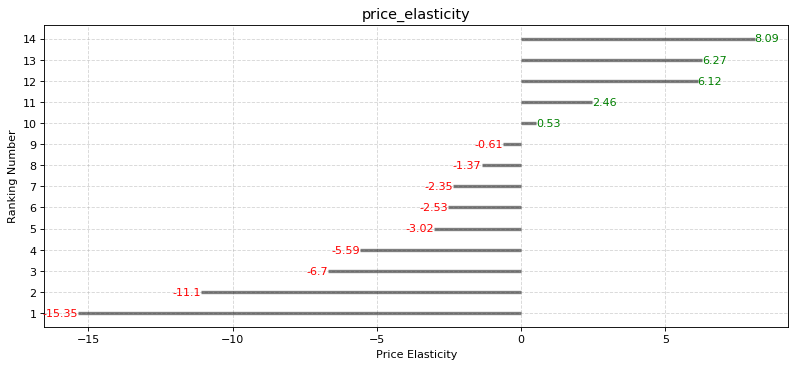

,name,price_elasticity
ranking,,
14,Apple - MacBook Pro¨ - 13 Display - Intel Core...,8.087901
13,Apple - MacBook Pro¨ - 13 Display - Intel Core...,6.272229
12,Samsung - Notebook 5 15.6 Touch-Screen Laptop ...,6.118304
11,Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...,2.459541
10,Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...,0.532044
9,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-0.613806
8,"Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop""",-1.371023
7,Details About Openbox Excellent: Asus Rog Gl50...,-2.349560
6,Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...,-2.527233


In [16]:
pe_plot = divergent_plot(df_elasticity, 'price_elasticity', 'Ranking Number', 'Price Elasticity')

Demand is said to be elastic when demand has a higher proportionate response to a smaller change in price. On the other hand, demand is inelastic when there is little movement in demand with a significant difference in price.

We can analyze in the results that the largest price elasticies are:
 - Apple - MacBook Pro¨ - 13 Display - Intel Core i5 - 8 GB Memory - 512GB -   Silver": PED of  **-15.35**
      - In other words: a 10% price increase in  Apple - MacBook Pro¨ - 13 512GB , it decreases ad impression demand by 153.5%
    

- Apple - MacBook Pro¨ - 13 Display - 256GB - Space Gray": PED of **8.09** 
  - In other words: a 10% price increase in Apple - MacBook Pro "" , it increases ad impression demand by 80.9%
    
    
Additional Information to take into consideration:

**Electronic Lifecycle product and price elasticity:**
In the growth phase of the product life cycle, the product will tend to be fairly inelastic. This is because of the nature of the demand. People buying at this stage will tend to be 'innovators' and they are prepared to take risks with new products and are willing to pay a high price to have the latest technology.

However, as the product moves towards maturity, the elasticity will increase. The amount of competition will increase and the increasing number of substitutes will make consumers more price sensitive. The nature of the consumers will also change and they are likely to be more motivated to buy by factors like price, functionality and reliability.

### References:
- (Doe, 2019) Cost and Economics in Pricing Strategy  (John Doe, University of Virginia)
- (OECD, 2003) OECD (https://stats.oecd.org/glossary/detail.asp?ID=3206)